# Pose Analyzer

## Integrantes

* Juan Sebastián Díaz
* Juan Sebastián Libreros

# Preprocesamiento de datos

Primero haremos el correcto procesamiento de los datos para poder crear un dataset robusto con el cual poder entrenar el modelo

In [56]:
import pandas
import numpy
import matplotlib.pyplot as plt

In [57]:
data = pandas.read_csv('./dataset/metadata/pose_data.csv')

data.head(10)

,video,frame_idx,label,x_0,y_0,z_0,visibility_0,x_1,y_1,z_1,...,z_30,visibility_30,x_31,y_31,z_31,visibility_31,x_32,y_32,z_32,visibility_32
0,andres_caminar1.MOV,1,caminar,0.301972,0.477756,-0.193664,0.999985,0.295878,0.470828,-0.184601,...,0.121710,0.829021,0.555963,0.438278,0.058729,0.976784,0.554118,0.501604,0.045032,0.974213
1,andres_caminar1.MOV,2,caminar,0.301838,0.477256,-0.129946,0.999984,0.295870,0.470535,-0.120004,...,0.101112,0.826934,0.555721,0.438236,0.037273,0.977096,0.554111,0.513806,0.030807,0.974254
2,andres_caminar1.MOV,3,caminar,0.301795,0.477179,-0.132016,0.999982,0.295879,0.470511,-0.121953,...,0.090213,0.821883,0.555446,0.437672,0.039159,0.976732,0.553865,0.515678,0.019650,0.973607
3,andres_caminar1.MOV,4,caminar,0.301776,0.477158,-0.129659,0.999981,0.295891,0.470543,-0.119794,...,0.089286,0.820505,0.555415,0.437371,0.030130,0.976909,0.553863,0.517355,0.019333,0.973626
4,andres_caminar1.MOV,5,caminar,0.301736,0.477175,-0.131916,0.999980,0.295887,0.470698,-0.122057,...,0.089644,0.820248,0.555364,0.437042,0.032270,0.977305,0.554018,0.517730,0.018779,0.973943
5,andres_caminar1.MOV,6,caminar,0.301701,0.477188,-0.124873,0.999979,0.295883,0.470758,-0.115134,...,0.093152,0.819726,0.555350,0.437333,0.028065,0.977464,0.554161,0.518750,0.022909,0.974058
6,andres_caminar1.MOV,7,caminar,0.301702,0.477188,-0.127569,0.999979,0.295889,0.470763,-0.117938,...,0.094566,0.819804,0.555371,0.437514,0.028523,0.977765,0.554273,0.518797,0.024545,0.974306
7,andres_caminar1.MOV,8,caminar,0.301753,0.477189,-0.132511,0.999978,0.295932,0.470767,-0.122863,...,0.092279,0.818164,0.555597,0.437737,0.025724,0.977949,0.554484,0.519127,0.020917,0.974356
8,andres_caminar1.MOV,9,caminar,0.301854,0.477153,-0.137571,0.999977,0.296009,0.470759,-0.127995,...,0.093374,0.816152,0.555960,0.437884,0.028502,0.978277,0.554694,0.519677,0.020699,0.974530
9,andres_caminar1.MOV,10,caminar,0.301989,0.477111,-0.139037,0.999977,0.296090,0.470753,-0.129757,...,0.089436,0.812445,0.556203,0.438295,0.028044,0.978412,0.554988,0.519221,0.015136,0.974410


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11104 entries, 0 to 11103
Columns: 135 entries, video to visibility_32
dtypes: float64(132), int64(1), object(2)
memory usage: 11.4+ MB


In [59]:
#Removemos las columnas identificadoras que no aporta informacion relevante
data = data.drop(columns=['video', 'frame_idx'])
data.head(10)

,label,x_0,y_0,z_0,visibility_0,x_1,y_1,z_1,visibility_1,x_2,...,z_30,visibility_30,x_31,y_31,z_31,visibility_31,x_32,y_32,z_32,visibility_32
0,caminar,0.301972,0.477756,-0.193664,0.999985,0.295878,0.470828,-0.184601,0.999938,0.295986,...,0.121710,0.829021,0.555963,0.438278,0.058729,0.976784,0.554118,0.501604,0.045032,0.974213
1,caminar,0.301838,0.477256,-0.129946,0.999984,0.295870,0.470535,-0.120004,0.999934,0.295985,...,0.101112,0.826934,0.555721,0.438236,0.037273,0.977096,0.554111,0.513806,0.030807,0.974254
2,caminar,0.301795,0.477179,-0.132016,0.999982,0.295879,0.470511,-0.121953,0.999929,0.295999,...,0.090213,0.821883,0.555446,0.437672,0.039159,0.976732,0.553865,0.515678,0.019650,0.973607
3,caminar,0.301776,0.477158,-0.129659,0.999981,0.295891,0.470543,-0.119794,0.999926,0.296014,...,0.089286,0.820505,0.555415,0.437371,0.030130,0.976909,0.553863,0.517355,0.019333,0.973626
4,caminar,0.301736,0.477175,-0.131916,0.999980,0.295887,0.470698,-0.122057,0.999923,0.296013,...,0.089644,0.820248,0.555364,0.437042,0.032270,0.977305,0.554018,0.517730,0.018779,0.973943
5,caminar,0.301701,0.477188,-0.124873,0.999979,0.295883,0.470758,-0.115134,0.999920,0.296012,...,0.093152,0.819726,0.555350,0.437333,0.028065,0.977464,0.554161,0.518750,0.022909,0.974058
6,caminar,0.301702,0.477188,-0.127569,0.999979,0.295889,0.470763,-0.117938,0.999916,0.296023,...,0.094566,0.819804,0.555371,0.437514,0.028523,0.977765,0.554273,0.518797,0.024545,0.974306
7,caminar,0.301753,0.477189,-0.132511,0.999978,0.295932,0.470767,-0.122863,0.999914,0.296071,...,0.092279,0.818164,0.555597,0.437737,0.025724,0.977949,0.554484,0.519127,0.020917,0.974356
8,caminar,0.301854,0.477153,-0.137571,0.999977,0.296009,0.470759,-0.127995,0.999912,0.296143,...,0.093374,0.816152,0.555960,0.437884,0.028502,0.978277,0.554694,0.519677,0.020699,0.974530
9,caminar,0.301989,0.477111,-0.139037,0.999977,0.296090,0.470753,-0.129757,0.999912,0.296214,...,0.089436,0.812445,0.556203,0.438295,0.028044,0.978412,0.554988,0.519221,0.015136,0.974410


In [60]:
#Ahora removemos las columnas visibility ya que no aportan informacion relevante
columns_to_remove = [col for col in data.columns if 'visibility' in col]
data = data.drop(columns=columns_to_remove)
data.head(10)

,label,x_0,y_0,z_0,x_1,y_1,z_1,x_2,y_2,z_2,...,z_29,x_30,y_30,z_30,x_31,y_31,z_31,x_32,y_32,z_32
0,caminar,0.301972,0.477756,-0.193664,0.295878,0.470828,-0.184601,0.295986,0.467288,-0.184607,...,0.132016,0.545631,0.499265,0.121710,0.555963,0.438278,0.058729,0.554118,0.501604,0.045032
1,caminar,0.301838,0.477256,-0.129946,0.295870,0.470535,-0.120004,0.295985,0.466606,-0.120026,...,0.106420,0.544423,0.503944,0.101112,0.555721,0.438236,0.037273,0.554111,0.513806,0.030807
2,caminar,0.301795,0.477179,-0.132016,0.295879,0.470511,-0.121953,0.295999,0.466463,-0.121977,...,0.106671,0.543323,0.506611,0.090213,0.555446,0.437672,0.039159,0.553865,0.515678,0.019650
3,caminar,0.301776,0.477158,-0.129659,0.295891,0.470543,-0.119794,0.296014,0.466465,-0.119818,...,0.097965,0.543201,0.506563,0.089286,0.555415,0.437371,0.030130,0.553863,0.517355,0.019333
4,caminar,0.301736,0.477175,-0.131916,0.295887,0.470698,-0.122057,0.296013,0.466518,-0.122078,...,0.101283,0.543258,0.506265,0.089644,0.555364,0.437042,0.032270,0.554018,0.517730,0.018779
5,caminar,0.301701,0.477188,-0.124873,0.295883,0.470758,-0.115134,0.296012,0.466531,-0.115158,...,0.097104,0.543299,0.505997,0.093152,0.555350,0.437333,0.028065,0.554161,0.518750,0.022909
6,caminar,0.301702,0.477188,-0.127569,0.295889,0.470763,-0.117938,0.296023,0.466530,-0.117961,...,0.097645,0.543333,0.505792,0.094566,0.555371,0.437514,0.028523,0.554273,0.518797,0.024545
7,caminar,0.301753,0.477189,-0.132511,0.295932,0.470767,-0.122863,0.296071,0.466529,-0.122885,...,0.096358,0.543606,0.505704,0.092279,0.555597,0.437737,0.025724,0.554484,0.519127,0.020917
8,caminar,0.301854,0.477153,-0.137571,0.296009,0.470759,-0.127995,0.296143,0.466502,-0.128015,...,0.099912,0.543798,0.505669,0.093374,0.555960,0.437884,0.028502,0.554694,0.519677,0.020699
9,caminar,0.301989,0.477111,-0.139037,0.296090,0.470753,-0.129757,0.296214,0.466482,-0.129777,...,0.100442,0.544175,0.505791,0.089436,0.556203,0.438295,0.028044,0.554988,0.519221,0.015136


In [61]:
print("Número de filas y columnas:", data.shape)
print("Nombres de las columnas:", data.columns.tolist())
# Revisar valores nulos
print("Valores nulos por columna:\n", data.isnull().sum())

Número de filas y columnas: (11104, 100)
Nombres de las columnas: ['label', 'x_0', 'y_0', 'z_0', 'x_1', 'y_1', 'z_1', 'x_2', 'y_2', 'z_2', 'x_3', 'y_3', 'z_3', 'x_4', 'y_4', 'z_4', 'x_5', 'y_5', 'z_5', 'x_6', 'y_6', 'z_6', 'x_7', 'y_7', 'z_7', 'x_8', 'y_8', 'z_8', 'x_9', 'y_9', 'z_9', 'x_10', 'y_10', 'z_10', 'x_11', 'y_11', 'z_11', 'x_12', 'y_12', 'z_12', 'x_13', 'y_13', 'z_13', 'x_14', 'y_14', 'z_14', 'x_15', 'y_15', 'z_15', 'x_16', 'y_16', 'z_16', 'x_17', 'y_17', 'z_17', 'x_18', 'y_18', 'z_18', 'x_19', 'y_19', 'z_19', 'x_20', 'y_20', 'z_20', 'x_21', 'y_21', 'z_21', 'x_22', 'y_22', 'z_22', 'x_23', 'y_23', 'z_23', 'x_24', 'y_24', 'z_24', 'x_25', 'y_25', 'z_25', 'x_26', 'y_26', 'z_26', 'x_27', 'y_27', 'z_27', 'x_28', 'y_28', 'z_28', 'x_29', 'y_29', 'z_29', 'x_30', 'y_30', 'z_30', 'x_31', 'y_31', 'z_31', 'x_32', 'y_32', 'z_32']
Valores nulos por columna:
 label    0
x_0      0
y_0      0
z_0      0
x_1      0
        ..
y_31     0
z_31     0
x_32     0
y_32     0
z_32     0
Length: 100, 

# Normalización de los datos

In [62]:
from sklearn.preprocessing import StandardScaler

numeric_cols = data.select_dtypes(include=['number']).columns

scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

data.head()

,label,x_0,y_0,z_0,x_1,y_1,z_1,x_2,y_2,z_2,...,z_29,x_30,y_30,z_30,x_31,y_31,z_31,x_32,y_32,z_32
0,caminar,0.628225,-0.311245,-0.162426,0.674120,-0.307456,-0.126584,0.674218,-0.289069,-0.126602,...,-0.017345,-1.909675,-0.632262,-0.153380,-1.962599,-0.271118,0.081251,-1.977013,-0.704238,-0.068272
1,caminar,0.626904,-0.318929,0.193116,0.674050,-0.312136,0.275545,0.674207,-0.299956,0.275431,...,-0.151824,-1.920426,-0.563807,-0.260579,-1.964677,-0.271585,-0.024431,-1.977078,-0.570695,-0.137436
2,caminar,0.626482,-0.320110,0.181564,0.674130,-0.312524,0.263408,0.674346,-0.302248,0.263285,...,-0.150506,-1.930223,-0.524794,-0.317301,-1.967030,-0.277815,-0.015139,-1.979179,-0.550208,-0.191681
3,caminar,0.626296,-0.320426,0.194716,0.674248,-0.312015,0.276851,0.674487,-0.302204,0.276722,...,-0.196245,-1.931311,-0.525503,-0.322123,-1.967296,-0.281141,-0.059611,-1.979193,-0.531848,-0.193222
4,caminar,0.625898,-0.320165,0.182127,0.674211,-0.309527,0.262761,0.674482,-0.301369,0.262653,...,-0.178810,-1.930801,-0.529854,-0.320262,-1.967729,-0.284774,-0.049074,-1.977871,-0.527747,-0.195913


# Reducir dimensionalidad (PCA)

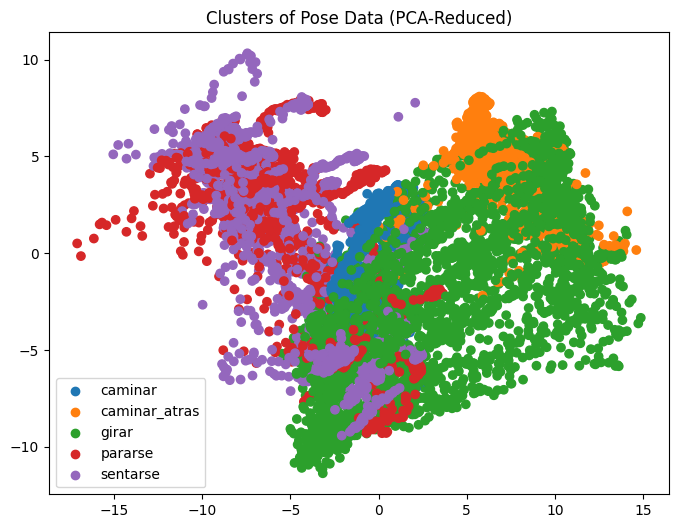

In [63]:
from sklearn.decomposition import PCA

labels = data['label']

data_features = data.drop(columns=['label'])

X = StandardScaler().fit_transform(data_features)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

unique_labels = labels.unique()
label_colors = {label: plt.get_cmap('tab10')(i) for i, label in enumerate(unique_labels)}

colors = [label_colors[label] for label in labels]


plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors)
plt.title("Clusters of Pose Data (PCA-Reduced)")

for label, color in label_colors.items():
  plt.scatter([], [], color=color, label=label)

plt.legend()
plt.show()

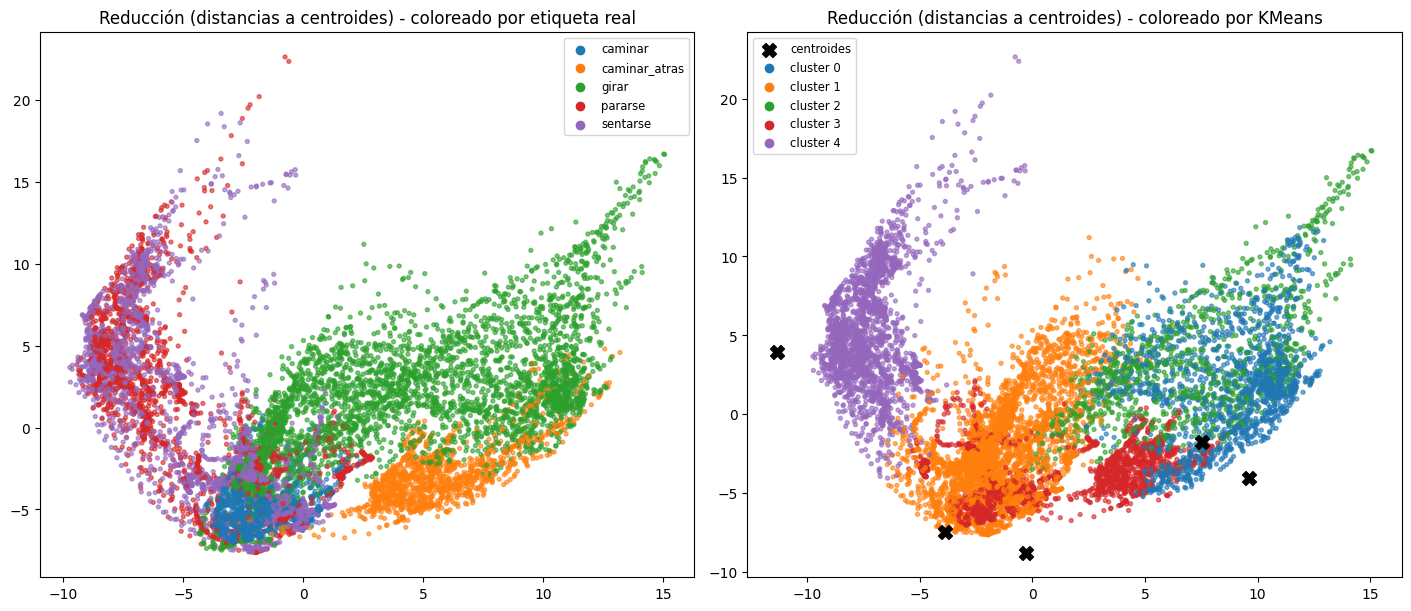

In [64]:
from sklearn.cluster import KMeans

n_clusters = len(unique_labels)

# Entrenar KMeans sobre X (ya estandarizado en la sesión)
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=2)
kmeans.fit(X)
klabels = kmeans.labels_

# Obtener representación reducida: distancias a centroides (dim = n_clusters)
X_km = kmeans.transform(X)

# Reducir esas distancias a 2D para visualización con PCA
pca_km = PCA(n_components=2)
X_km_2d = pca_km.fit_transform(X_km)

# Centroides proyectados a 2D
# Nota: los centroides de KMeans están en el espacio original (99 dims).
# Primero obtenemos su representación en el espacio "distancias a centroides" usando kmeans.transform(...)
centroids_2d = pca_km.transform(kmeans.transform(kmeans.cluster_centers_))

# Plot: comparación visual entre etiquetas reales y clusters de KMeans sobre la reducción
fig, axes = plt.subplots(1, 2, figsize=(14, 6), constrained_layout=True)

# Izquierda: coloreado por etiqueta real
axes[0].scatter(X_km_2d[:, 0], X_km_2d[:, 1], c=[label_colors[l] for l in labels], s=8, alpha=0.6)
axes[0].set_title("Reducción (distancias a centroides) - coloreado por etiqueta real")
for lab, col in label_colors.items():
    axes[0].scatter([], [], color=col, label=lab)
axes[0].legend(loc='best', fontsize='small')

# Derecha: coloreado por cluster asignado por KMeans
cmap = plt.get_cmap('tab10')
cluster_colors = [cmap(i) for i in range(n_clusters)]
axes[1].scatter(X_km_2d[:, 0], X_km_2d[:, 1], c=[cluster_colors[i] for i in klabels], s=8, alpha=0.6)
# marcar centroides
axes[1].scatter(centroids_2d[:, 0], centroids_2d[:, 1], c='black', s=100, marker='X', label='centroides')
for i, col in enumerate(cluster_colors):
    axes[1].scatter([], [], color=col, label=f'cluster {i}')
axes[1].set_title("Reducción (distancias a centroides) - coloreado por KMeans")
axes[1].legend(loc='best', fontsize='small')

plt.show()